In [1]:
#import zakladnych kniznic
import pandas as pd
import numpy as np

In [2]:
#nacitanie datasetu
dataset = pd.read_csv('breast_cancer_prediction.csv')
dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
#zisťovanie počtu duplicít
dataset.duplicated().sum()

8

Potrebujeme odstrániť duplicity údajov pre tie isté pacientky.

In [4]:
#odstránenie duplicít a nasledná kontrola
dataset = dataset.drop_duplicates()
dataset.duplicated().sum()

0

In [5]:
#z výpisu datasetu hneď vidíme, že prvý stĺpec na trénovanie NS nebudeme potrebovať

dataset = dataset.iloc[:,1:]

#zmena hodnôt stĺpca 'Class' z 2 a 4 na 0 a 1:
#0 -> nezhubný nádor
#1 -> zhubný nádor
#túto  zmenu vykonávame, pretože sa jedná o binárnu klasifikáciu, kde na výstupe máme jeden neurón s hodnotou 1 alebo 0

dataset['Class'].replace({2: 0, 4: 1}, inplace=True)
dataset

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,0
679,2,1,1,1,2,1,1,1,1,0
680,5,10,10,3,7,3,8,10,2,1
681,4,8,6,4,3,4,10,6,1,1


In [6]:
#zistovania poctu duplicit
#dataset.duplicated().sum()

In [7]:
#odstránenie duplicit a nasledna kontrola
#dataset = dataset.drop_duplicates()
#dataset.duplicated().sum()

In [8]:
#zobrazenie základných informácií o datasete (pre každý stĺpec):
#počet záznamov, medián, minimálna hodnota, maximálna hodnota, prvý, druhý a tretí kvartil

dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,4.451852,3.146667,3.208889,2.848889,3.229630,3.537778,3.442963,2.885926,1.607407,0.349630
std,2.820859,3.055005,2.976552,2.875917,2.208497,3.637871,2.453894,3.065607,1.741006,0.477207
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


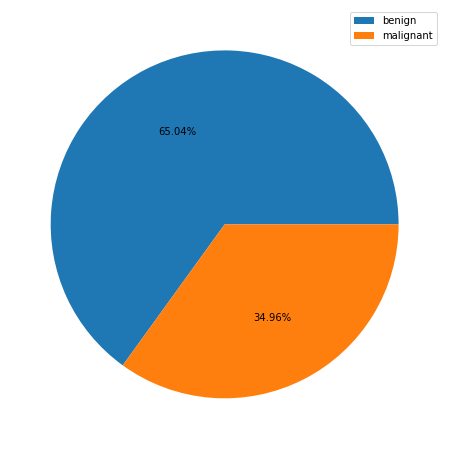

In [9]:
#vizualizácia pomeru počtu pacientok s rakovinou zhubnej a počtu pacientok s rakovinou nezhubnej formy
#vidíme, že väčšina pacientok má nezhubnú formu

import matplotlib.pyplot as plt
class_count = dataset['Class'].value_counts()
data = np.array([class_count[0],class_count[1]])
labels = ['benign', 'malignant']
fig1, ax1 = plt.subplots(figsize=(8,8))

ax1.pie(data,autopct='%.2f%%')
plt.legend(labels=labels)
plt.show()   

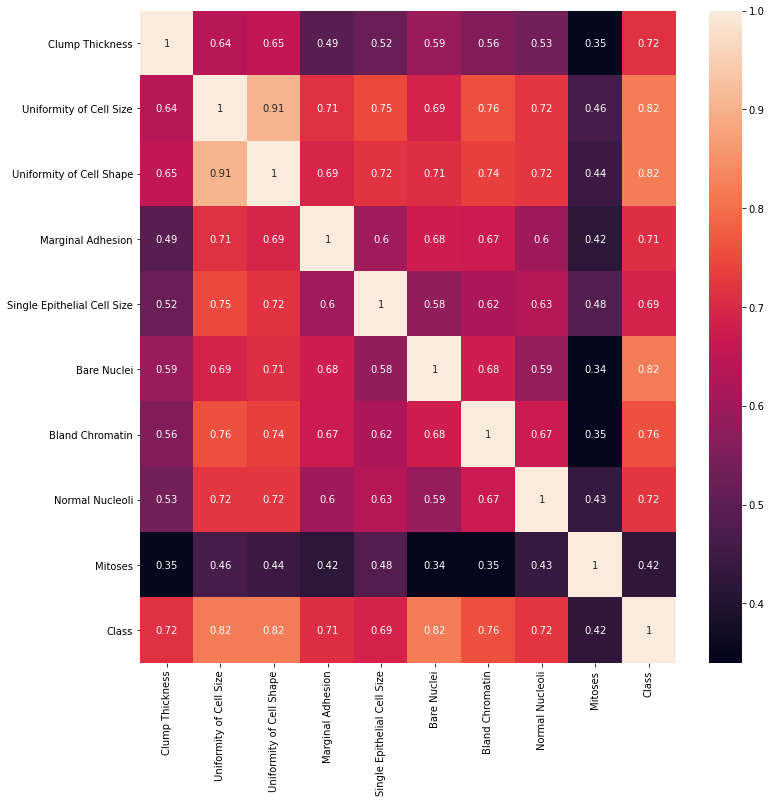

In [10]:
#vizualizácia korelácie stĺpcov v datasete

import seaborn as sb
corrMatrix = dataset.corr()
plt.subplots(figsize=(12,12))
sb.heatmap(corrMatrix, annot=True)
plt.show()

Na predchádzajúcom grafe môžeme vidieť, že stĺpec "Class" najviac lineárne koreluje so stĺpcami "Uniformity of Cell Size", "Uniformity of Cell Shape", "Bare Nuclei" a "Bland Chromatin", preto si tieto stĺpce ďalej vizualizujeme. Stĺpec "Mitoses" najmenej koreluje so stĺpcom "Class", preto ho ďalej nebudeme používať.

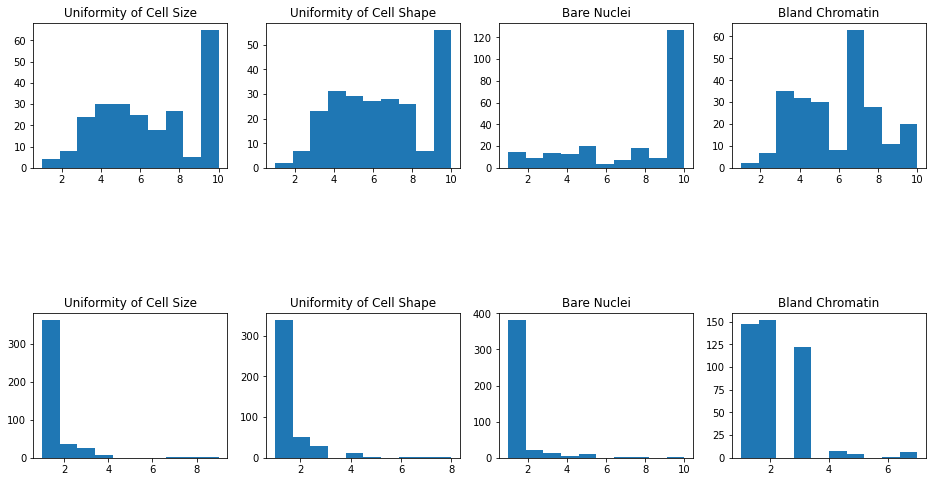

In [11]:
#vizualizácia relevantných stĺpcov pre "Class" == 1
#teda počty pacientok so zhubnou rakovinou pre jednotlivé hodnoty v daných stĺpcoch - histogramy

malignant = dataset.loc[(dataset['Class'] == 1)]

fig, ax = plt.subplots(2,4,figsize=(16, 8) )

i = 0

col_m = malignant.columns[1:3]
col_m = col_m.append(malignant.columns[5:7])

for c in col_m:
    ax[0,i].hist(malignant[c])
    ax[0,i].set_title(c)
    i = i + 1

#vizualizácia relevantných stĺpcov pre "Class" == 2
#teda počty pacientok so zhubnou rakovinou pre jednotlivé hodnoty v daných stĺpcoch - histogramy    
    
benign = dataset.loc[(dataset['Class'] == 0)]

col_b = benign.columns[1:3]
col_b = col_b.append(benign.columns[5:7])

i = 0

for c in col_b:
    ax[1,i].hist(benign[c])
    ax[1,i].set_title(c)
    i = i + 1

fig.subplots_adjust(hspace=1, wspace=0.2)
plt.show()

Ako môžeme pozorovať potvrdilo sa nám, že medzi zvolenými stĺpcami a cieľovým stĺpcom "Class" je lineárna korelácia. Väčšina pacientok s benígnym nádorom dosahuje v týchto stĺpcocch nízke hodnoty. Pacientky s vyššími hodnotami zas väčšínou majú malígny nádor.

<AxesSubplot:xlabel='Bland Chromatin', ylabel='Count'>

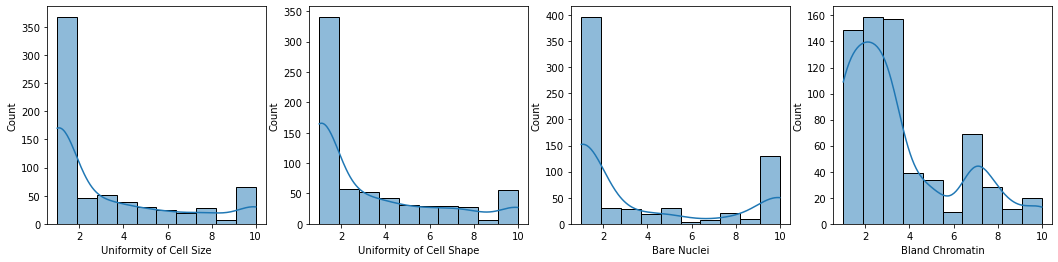

In [12]:
#vizualizácia relevantnych stĺpcov pre všetky dáta - histogamy

fig, axes = plt.subplots(1,4, figsize=(18,4))
sb.histplot(dataset['Uniformity of Cell Size'], bins=10, kde=True, ax=axes[0])
sb.histplot(dataset['Uniformity of Cell Shape'], bins=10, kde=True, ax=axes[1])
sb.histplot(dataset['Bare Nuclei'], bins=10, kde=True, ax=axes[2])
sb.histplot(dataset['Bland Chromatin'], bins=10, kde=True, ax=axes[3])

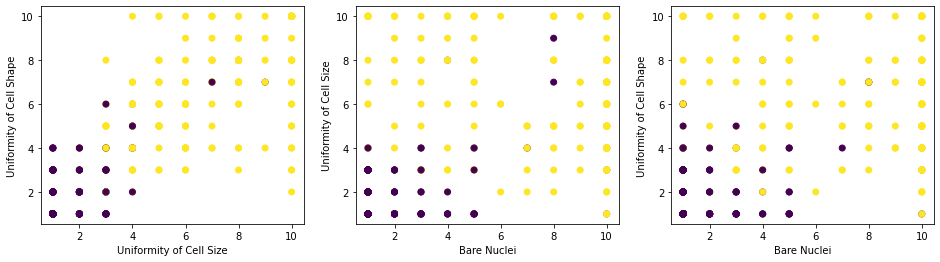

In [13]:
#vizualizácia dát na základe hodnôt relevantných stĺpcov
#tu môžeme vidieť koreláciu medzi stĺpcami "Uniformity of Cell Size" a "Uniformity of Cell Shape"
#tiež pozorujeme, že pacietka má pravdepodobne nezhubný nádor vačšinou, hodnoty vo všetkých stĺpcoch malé, ale ak už je
#jedna z hodnôt vyššia ako 6, je pravdepodobné, že má zhubný nádor

fig, ax = plt.subplots(1,3,figsize=(16, 4) )
ax[0].scatter(dataset['Uniformity of Cell Size'], dataset['Uniformity of Cell Shape'], c = dataset['Class'])
ax[0].set_xlabel('Uniformity of Cell Size')
ax[0].set_ylabel('Uniformity of Cell Shape')
ax[1].scatter(dataset['Bare Nuclei'], dataset['Uniformity of Cell Size'], c = dataset['Class'])
ax[1].set_xlabel('Bare Nuclei')
ax[1].set_ylabel('Uniformity of Cell Size')
ax[2].scatter(dataset['Bare Nuclei'], dataset['Uniformity of Cell Shape'], c = dataset['Class'])
ax[2].set_xlabel('Bare Nuclei')
ax[2].set_ylabel('Uniformity of Cell Shape')

plt.show()

In [14]:
# from mpl_toolkits.mplot3d import Axes3D
# %matplotlib widget

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# x =dataset['Uniformity of Cell Size']
# y =dataset['Uniformity of Cell Shape']
# z =dataset['Bare Nuclei']

# scatter=ax.scatter(x, y, z, c=dataset['Class'], marker='o')

# ax.set_xlabel('Uniformity of Cell Size')
# ax.set_ylabel('Uniformity of Cell Shape')
# ax.set_zlabel('Bare Nuclei')

# legend1 = ax.legend(*scatter.legend_elements(),
#                     loc="upper right", title="Class")
# ax.add_artist(legend1)

# #fig.suptitle('')

# plt.show()

In [15]:
#rozdelenie dát na množinu X a y

y = dataset.iloc[:,9].values
X = dataset.iloc[:,0:8].values

In [16]:
X[:10]

array([[ 5,  1,  1,  1,  2,  1,  3,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2],
       [ 3,  1,  1,  1,  2,  2,  3,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7],
       [ 4,  1,  1,  3,  2,  1,  3,  1],
       [ 8, 10, 10,  8,  7, 10,  9,  7],
       [ 1,  1,  1,  1,  2, 10,  3,  1],
       [ 2,  1,  2,  1,  2,  1,  3,  1],
       [ 2,  1,  1,  1,  2,  1,  1,  1],
       [ 4,  2,  1,  1,  2,  1,  2,  1]], dtype=int64)

In [17]:
y[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [18]:
#rozdelenie množín na testovacie a trénovacie dáta pomocou funkcie train_test_split
#keďže máme relatívne malý dataset zvolili sme veľkosť testovacej množiny 20%, aby sme mali dostatok trénovacích dát
#seed bol vybraný náhodne

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [36]:
#zistenie počtu riadkov trénovacích dát
len(X_train)

540

In [38]:
#zistenie počtu riadkov testovacích dát
len(X_test)

135

In [23]:
# #skalovanie hodnot X

# from sklearn.preprocessing import StandardScaler
# from keras.utils import to_categorical

# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [24]:
# X_train[:10]

In [25]:
# X_test[:10]

In [27]:
#trénovanie modelu
import keras
from keras.models import Sequential
from keras.layers import Dense

#zvolili sme keras model Sequential s dvoma skrytými vrstvami s veľkosťou 16 a 8, pri vačších vrstvách nastáva overfit
#vstupná vrstva má 8 neurónov, lebo do siete vstupujú hodnotu 8 stĺpcov
#výstupná vrstva má veľkost 1, lebo sa jedná o binárnu klasifikáciu, ktorej výstupom je hodnota 0 alebo 1
#z rovnakého dôvodu je aktivačná funkcia poslednej vrstvy sigmoid a loss funkcia pre model je 'binary_crossentropy'

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(8,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#ako optimizer sme zvolili Adam
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#trénujeme model na 100 epoch a poskytujeme mu aj validačné dáta aby sme vedeli vizualizovať loss a accuraccy
#pre trénvacie aj testovacie dáta
#batch size je množstvo riadkov v skupinách, na ktorých sa model trénuje v každej epoche
visualisation = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=30, verbose=1)

Epoch 1/100
18/18 [==============================] - 2s 62ms/step - loss: 1.0543 - accuracy: 0.6030 - val_loss: 0.8875 - val_accuracy: 0.4667
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8339 - accuracy: 0.4251 - val_loss: 0.7257 - val_accuracy: 0.3852
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6816 - accuracy: 0.6047 - val_loss: 0.6215 - val_accuracy: 0.7778
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5991 - accuracy: 0.8490 - val_loss: 0.5604 - val_accuracy: 0.8889
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 0.5544 - accuracy: 0.8907 - val_loss: 0.4909 - val_accuracy: 0.8963
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4860 - accuracy: 0.8928 - val_loss: 0.4112 - val_accuracy: 0.9407
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 0.4402 - accuracy: 0.8888 - val_loss: 0.3701 - val_accuracy: 0.9407
Epoch 8/100


18/18 [==============================] - 0s 3ms/step - loss: 0.0840 - accuracy: 0.9830 - val_loss: 0.0596 - val_accuracy: 0.9778
Epoch 59/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0987 - accuracy: 0.9719 - val_loss: 0.0623 - val_accuracy: 0.9778
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0892 - accuracy: 0.9745 - val_loss: 0.0588 - val_accuracy: 0.9778
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.9811 - val_loss: 0.0590 - val_accuracy: 0.9778
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0900 - accuracy: 0.9750 - val_loss: 0.0578 - val_accuracy: 0.9778
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0961 - accuracy: 0.9736 - val_loss: 0.0584 - val_accuracy: 0.9778
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0814 - accuracy: 0.9807 - val_loss: 0.0572 - val_accuracy: 0.9778
Epoch 65/100
18/18 

In [29]:
#predikcia a jej presnosť na testovacích dátach

y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
score = np.array(score)
print('---------------------------------------------------------------------------------------')
print('loss: ',score[0] * 100,'%') 
print('accuracy: ',score[1] * 100,'%') 

5/5 [==============================] - 0s 1000us/step - loss: 0.0502 - accuracy: 0.9778
---------------------------------------------------------------------------------------
loss:  5.017995834350586 %
accuracy:  97.77777791023254 %


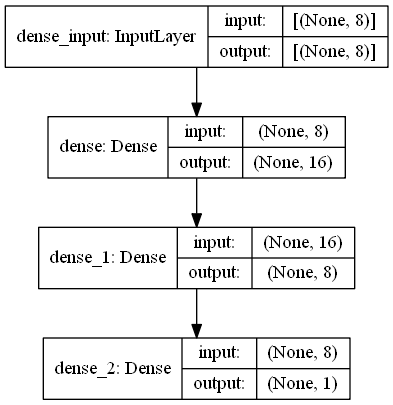

In [30]:
#vizualizácia vrstiev NS

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

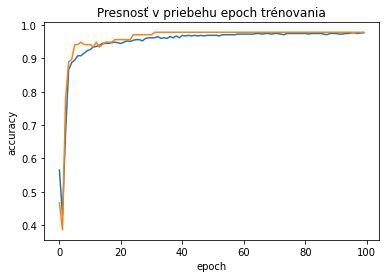

In [31]:


plt.plot(visualisation.history['accuracy'])
plt.plot(visualisation.history['val_accuracy'])
plt.title('Presnosť v priebehu epoch trénovania')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

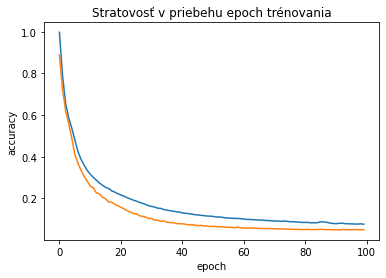

In [32]:


plt.plot(visualisation.history['loss'])
plt.plot(visualisation.history['val_loss'])
plt.title('Stratovosť v priebehu epoch trénovania')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [33]:
def predict(clump_thickness,uniformity_of_cell_size, uniformity_of_cell_shape, 
            marginal_adhesion, single_epithelial_cell_size, bare_nuclei, 
            bland_chromatin,normal_nucleoli):
    predict_df = pd.DataFrame({'Clump Thickness':int(clump_thickness), 
                               'Uniformity of Cell Size':int(uniformity_of_cell_size),
                               'Uniformity of Cell Shape':int(uniformity_of_cell_shape), 
                               'Marginal Adhesion':int(marginal_adhesion),
                               'Single Epithelial Cell Size':int(single_epithelial_cell_size), 
                               'Bare Nuclei':int(bare_nuclei), 
                               'Bland Chromatin':int(bland_chromatin),
                               'Normal Nucleoli':int(normal_nucleoli)}, index=[0]) 
                               #'Mitoses':int(mitoses)}, index=[0])
    X = scaler.transform(predict_df)
    prediction = (model.predict(X) > 0.5).astype("int32")
    score_percents = score * 100
    if(prediction[0]==1):
        return "Prediction: malignant"
    else:
        return "Prediction: benign"

In [34]:
# clump_thickness = input('Clump Thickness: ')
# uniformity_of_cell_size = input('Uniformity of Cell Size: ')
# uniformity_of_cell_shape = input('Uniformity of Cell Shape: ')
# marginal_adhesion = input('Marginal Adhesion: ')
# single_epithelial_cell_size = input('Single Epithelial Cell Size: ')
# bare_nuclei = input('Bare Nuclei: ')
# bland_chromatin = input('Bland Chromatin: ')
# normal_nucleoli = input('Normal Nucleoli: ')

In [35]:
# predict(clump_thickness,uniformity_of_cell_size, uniformity_of_cell_shape, marginal_adhesion, 
#         single_epithelial_cell_size, bare_nuclei, bland_chromatin,normal_nucleoli)